In [79]:
##Maxim Paxton
## Home assignment 2
## 101064370

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras

In [123]:
#retrieving data from .json files
df_train = pd.read_json("./train.json")
df_test = pd.read_json("./test.json")
df_train

,cuisine,id,ingredients
0,italian,0,"[penne, shallots, rice vinegar, fresh basil, g..."
1,greek,1,"[sugar, chopped walnuts, filo dough, chopped a..."
2,italian,2,"[fresh rosemary, chopped fresh thyme, fresh or..."
3,southern_us,3,"[sugar, hot sauce, ramps, vinegar, cream chees..."
4,french,4,"[ground cinnamon, panettone, whipped cream, Am..."
5,mexican,5,"[kosher salt, jalapeno chilies, purple onion, ..."
6,southern_us,6,"[water, freshly ground pepper, salt, grits]"
7,mexican,7,"[green chile, salt, onions, onion powder, chic..."
8,southern_us,8,"[garlic powder, pork spareribs, sesame seeds, ..."
9,moroccan,9,"[garbanzo beans, fat skimmed chicken broth, gr..."


In [81]:
##Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
## Define the vectorizer
v = CountVectorizer()

In [82]:
#make arrays into list for model to come
df_train['list_ingredients'] = df_train['ingredients'].apply(', '.join)
df_test['list_ingredients'] = df_test['ingredients'].apply(', '.join)

In [92]:
#must convert out data into number because 
#model doesn't understand strings
v.fit(df_train['list_ingredients'])
X_train_transformed = v.transform(df_train['list_ingredients']).toarray()
X_test_transformed = v.transform(df_test['list_ingredients']).toarray()
X_train_transformed.shape
#print("done")

(29774, 2868)

In [84]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(df_train["cuisine"])
y = enc.transform(df_train["cuisine"])
#y = enc.transform(df_test["cuisine"])
num_of_cuisine = y.max()+1

In [85]:
#one HOt-encode city Labels
def one_hot_ecode_labels(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

cuisine_labels = one_hot_ecode_labels(y, 20)
len(cuisine_labels[0])


20

In [110]:
#Data is ready,
#Time to instantiate the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 

model = Sequential()
model.add(Dense(5736, activation='relu', input_shape=(2868,)))
model.add(Dropout(0.5))
model.add(Dense(2869, activation='relu'))
model.add(Dense(num_of_cuisine, activation='softmax'))

In [111]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.metrics_names)

['loss', 'acc']


In [130]:
history = model.fit(X_train_transformed,
                    cuisine_labels,
                    epochs=2,
                    batch_size=512,
                    validation_split= 0.3)
score = model.evaluate(X_train_transformed,cuisine_labels,batch_size=512)
print("Test Loss: {}".format(score[0]))
print("Test Accuracy: {}".format(score[1]))

Train on 20841 samples, validate on 8933 samples
Epoch 1/2
20841/20841 [==============================] - 68s 3ms/step - loss: 0.0082 - acc: 0.9979 - val_loss: 1.8464 - val_acc: 0.7985
Epoch 2/2
29774/29774 [==============================] - 15s 516us/step
Test Loss: 0.5601368415457942
Test Accuracy: 0.9383690467793345


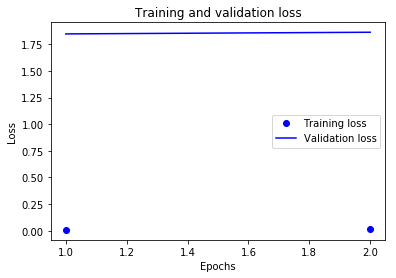

In [131]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
#tried multiple epochs but between 2-3 works best
#8 was ok
# 12 was too much

In [132]:
file = pd.DataFrame()
file['id'] = df_test["id"]

predictions = model.predict(X_test_transformed)

def num_to_string(num_array, enc):
    string_cuisine = []
    for num in num_array:
        string_cuisine.append(enc.classes_[num])
    return string_cuisine
        
file['cuisine'] = num_to_string(predictions.argmax(1), enc)

file.to_csv('Maxim_Paxton_Assignment1_Predictions.csv', index=False)